In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import torch
import torchaudio
import torchaudio.functional as F
import librosa
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from IPython.display import Audio, display

In [12]:
def load_audio(file_path, sr=None):
    try:
        audio_data, sampling_rate = librosa.load(file_path, sr=sr)
        return audio_data, sampling_rate
    except Exception as e:
        print(f"Error reading audio file: {e}")
        return None, None


def downsample_audio(audio, original_sr, target_sr):
    return librosa.resample(audio, orig_sr=original_sr, target_sr=target_sr)


def audio_to_melspectrogram(audio, sampling_rate, hop_length=256, n_fft=2048):
    spectrogram = librosa.feature.melspectrogram(
        y=audio, sr=sampling_rate, hop_length=hop_length, n_fft=n_fft
    )
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram


def cut_random_segment(audio, segment_size):
    max_start_time = max(0, len(audio) - segment_size)
    start_time = np.random.randint(0, max_start_time)
    return audio[start_time : (start_time + segment_size)]


def show_melspectrogram(
    spectrogram, sampling_rate, title="log-frequency power spectrogram"
):
    librosa.display.specshow(spectrogram, x_axis="time", y_axis="mel", sr=sampling_rate)
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()


def show_signal(audio):
    plt.plot(audio)
    plt.title("Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()


def show_and_play_signal(audio, sample_rate):
    plt.plot(audio)
    plt.title("Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()
    display(Audio(audio, rate=sample_rate))


def read_as_melspectrogram(file_path):
    audio, sampling_rate = load_audio(file_path)
    spectrogram = audio_to_melspectrogram(audio, sampling_rate)
    return spectrogram


def apply_effect(waveform, sample_rate, effect):
    effector = torchaudio.io.AudioEffector(effect=effect)
    return effector.apply(waveform, sample_rate)

In [3]:
from torchaudio.utils import download_asset


SAMPLE_WAV = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.wav")
SAMPLE_RIR = download_asset(
    "tutorial-assets/Lab41-SRI-VOiCES-rm1-impulse-mc01-stu-clo-8000hz.wav"
)
SAMPLE_SPEECH = download_asset(
    "tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav"
)
SAMPLE_NOISE = download_asset(
    "tutorial-assets/Lab41-SRI-VOiCES-rm1-babb-mc01-stu-clo-8000hz.wav"
)

100%|██████████| 427k/427k [00:00<00:00, 9.42MB/s]
100%|██████████| 31.3k/31.3k [00:00<00:00, 351kB/s]
100%|██████████| 53.2k/53.2k [00:00<00:00, 676kB/s]
100%|██████████| 78.2k/78.2k [00:00<00:00, 443kB/s]


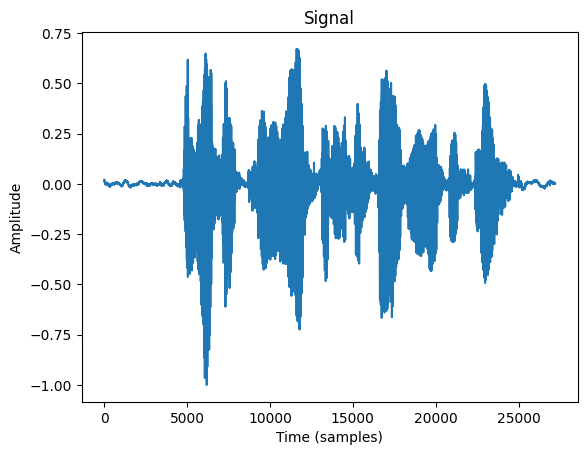

In [15]:
waveform, sample_rate = load_audio(SAMPLE_SPEECH)
show_and_play_signal(waveform, sample_rate)

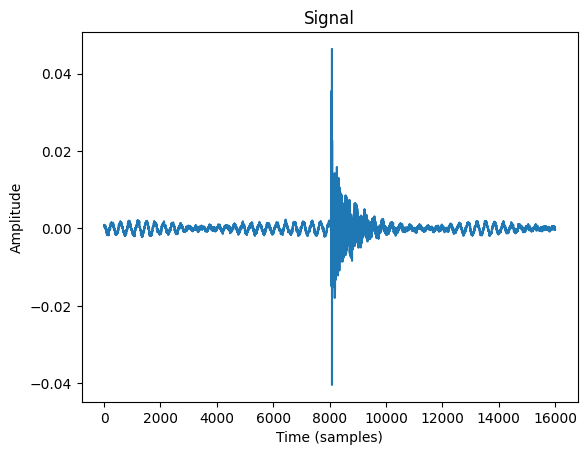

In [26]:
rir_raw, sample_rate = load_audio(SAMPLE_RIR)
show_and_play_signal(rir_raw, sample_rate)

In [35]:
rir = rir_raw[int(sample_rate * 1.01) : int(sample_rate * 1.3)]
rir = rir / np.linalg.norm(rir, ord=2)

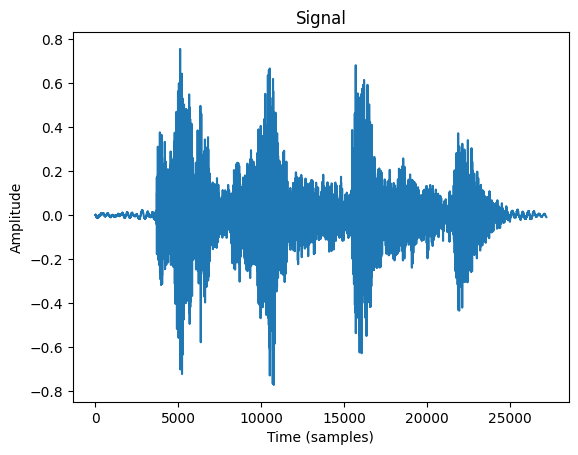

In [38]:
waveform_rir = np.convolve(waveform, rir, mode="same")
show_and_play_signal(waveform_rir, sample_rate)

In [45]:
from torchaudio_augmentations import RandomRIR


aug = RandomRIR("bank/rir_8k.pkl")

In [ ]:
waveform_rir = aug(waveform)
show_and_play_signal(waveform_rir, sample_rate)